**Note**: Some of the PyTorch code examples are digested from 

1. [Deep Learning with PyTorch: A 60 Minute Blitz](https://pytorch.org/tutorials/beginner/deep_learning_60min_blitz.html) 
2. [Github repo](https://github.com/deep-learning-with-pytorch/dlwpt-code) for "Deep Learning with PyTorch" by Hu

# Google Colab Basics



## Check the resources obtained from Collab

Google colab is a free to use Jupyter notebook , that allows you to use free Tesla T4 GPU it also gives you a total of 12 GB of ram , and you can use it up to 12 hours in row

In [8]:
!lsb_release -a

No LSB modules are available.
Distributor ID:	Ubuntu
Description:	Ubuntu 18.04.3 LTS
Release:	18.04
Codename:	bionic


In [9]:
!uname -r

4.19.104+


In [10]:
!lscpu | grep 'Model name'
!lscpu | grep 'Socket(s):'
!lscpu | grep 'Thread(s) per core'
!lscpu | grep "L3 cache"

Model name:          Intel(R) Xeon(R) CPU @ 2.30GHz
Socket(s):           1
Thread(s) per core:  2
L3 cache:            46080K


In [11]:
!cat /proc/meminfo | grep 'MemAvailable'

MemAvailable:   12451216 kB


In [12]:
!df -h / | awk '{print $4}'

Avail
34G


In [13]:
!nvidia-smi

Thu Apr 23 18:23:37 2020       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 440.64.00    Driver Version: 418.67       CUDA Version: 10.1     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|===============================+======================+======================|
|   0  Tesla K80           Off  | 00000000:00:04.0 Off |                    0 |
| N/A   46C    P8    30W / 149W |      0MiB / 11441MiB |      0%      Default |
+-------------------------------+----------------------+----------------------+
                                                                               
+-----------------------------------------------------------------------------+
| Processes:                                                       GPU Memory |
|  GPU  

## Check the libs in Colab

In [14]:
import sys
print('The python version is', sys.version)

The python version is 3.6.9 (default, Nov  7 2019, 10:44:02) 
[GCC 8.3.0]


In [15]:
from __future__ import print_function
import torch
print(torch.__version__)

1.4.0


In [16]:
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")
print(device)

cuda:0


# Tensor Basics 
Similiar to np.

### Initialization 

In [17]:
# Construct a 5x3 matrix, uninitialized
x = torch.empty(5, 3)
print(x)

tensor([[1.8347e-35, 0.0000e+00, 0.0000e+00],
        [0.0000e+00, 0.0000e+00, 0.0000e+00],
        [0.0000e+00, 0.0000e+00, 2.8026e-45],
        [0.0000e+00, 1.1210e-44, 0.0000e+00],
        [1.4013e-45, 0.0000e+00, 0.0000e+00]])


In [18]:
x.shape

torch.Size([5, 3])

In [19]:
a = torch.ones(3, dtype=torch.long)
a

tensor([1, 1, 1])

In [20]:
x = torch.tensor([5.5, 3])
x

tensor([5.5000, 3.0000])

In [21]:
# Creating a tensor based on an existing tensor. These methods will reuse properties of the input tensor, e.g. dtype
x = x.new_ones(5, 3, dtype=torch.double) # new_* methods take in sizes
x

tensor([[1., 1., 1.],
        [1., 1., 1.],
        [1., 1., 1.],
        [1., 1., 1.],
        [1., 1., 1.]], dtype=torch.float64)

In [22]:
x = torch.randn_like(x, dtype=torch.float)    # override dtype!
x

tensor([[-0.0129,  0.7334,  0.9376],
        [ 0.7264, -2.0181,  1.9133],
        [ 0.0764, -0.8140, -0.6788],
        [-0.0657,  0.7543, -0.4570],
        [-0.4238, -1.4652,  0.3472]])

In [23]:
y = torch.rand(5, 3)
y

tensor([[0.8577, 0.8506, 0.3251],
        [0.6154, 0.6882, 0.3017],
        [0.6551, 0.1195, 0.9619],
        [0.1236, 0.7157, 0.1319],
        [0.1125, 0.1385, 0.5837]])

### Operations

In [24]:
x + y

tensor([[ 0.8448,  1.5841,  1.2627],
        [ 1.3418, -1.3299,  2.2150],
        [ 0.7314, -0.6944,  0.2831],
        [ 0.0579,  1.4700, -0.3251],
        [-0.3113, -1.3267,  0.9309]])

In [25]:
torch.add(x, y)

tensor([[ 0.8448,  1.5841,  1.2627],
        [ 1.3418, -1.3299,  2.2150],
        [ 0.7314, -0.6944,  0.2831],
        [ 0.0579,  1.4700, -0.3251],
        [-0.3113, -1.3267,  0.9309]])

In [26]:
result = torch.empty(5, 3)
torch.add(x, y, out=result)
result

tensor([[ 0.8448,  1.5841,  1.2627],
        [ 1.3418, -1.3299,  2.2150],
        [ 0.7314, -0.6944,  0.2831],
        [ 0.0579,  1.4700, -0.3251],
        [-0.3113, -1.3267,  0.9309]])

In [27]:
y.add_(x)
y

tensor([[ 0.8448,  1.5841,  1.2627],
        [ 1.3418, -1.3299,  2.2150],
        [ 0.7314, -0.6944,  0.2831],
        [ 0.0579,  1.4700, -0.3251],
        [-0.3113, -1.3267,  0.9309]])

### Numpy Interchangability

In [28]:
a = torch.ones(5)
a

tensor([1., 1., 1., 1., 1.])

In [29]:
b = a.numpy()
b

array([1., 1., 1., 1., 1.], dtype=float32)

In [30]:
a.add_(1) # np and torch share the same memory
print(a)
print(b)

tensor([2., 2., 2., 2., 2.])
[2. 2. 2. 2. 2.]


In [31]:
import numpy as np
a = np.ones(5)
b = torch.from_numpy(a)
np.add(a, 1, out=a)
print(a)
print(b)

[2. 2. 2. 2. 2.]
tensor([2., 2., 2., 2., 2.], dtype=torch.float64)


### Storage and Views

In [32]:
points = torch.FloatTensor([[4.0, 1.0], [5.0, 3.0], [2.0, 1.0]])
points

tensor([[4., 1.],
        [5., 3.],
        [2., 1.]])

In [33]:
points.storage() # same as C.

 4.0
 1.0
 5.0
 3.0
 2.0
 1.0
[torch.FloatStorage of size 6]

In [34]:
points_storage = points.storage()
points_storage[0] = 2.0
points

tensor([[2., 1.],
        [5., 3.],
        [2., 1.]])

In [35]:
points = torch.tensor([[4.0, 1.0], [5.0, 3.0], [2.0, 1.0]])
second_point = points[1]
second_point.storage_offset()

2

In [36]:
second_point.size()

torch.Size([2])

In [37]:
second_point.shape

torch.Size([2])

In [38]:
# Stride is a tuple indicating the number of elements in the storage that have to be skipped when the index is increased by 1 in each dimension
points.stride()

(2, 1)

In [39]:
second_point.stride()

(1,)

In [40]:
points = torch.tensor([[4.0, 1.0], [5.0, 3.0], [2.0, 1.0]])
second_point = points[1].clone()
second_point[0] = 10.0
points

tensor([[4., 1.],
        [5., 3.],
        [2., 1.]])

In [41]:
points_t = points.t()
points_t

tensor([[4., 5., 2.],
        [1., 3., 1.]])

In [42]:
id(points.storage()) == id(points_t.storage())

True

In [43]:
points.stride()

(2, 1)

In [44]:
points_t.stride()

(1, 2)

In [45]:
points.is_contiguous()

True

In [46]:
points_t.is_contiguous()

False

In [47]:
x = torch.randn(4, 4)
y = x.view(16)
z = x.view(-1, 8)  # the size -1 is inferred from other dimensions
print(x.size(), y.size(), z.size())

torch.Size([4, 4]) torch.Size([16]) torch.Size([2, 8])


### CUDA Tensors

In [48]:
if torch.cuda.is_available():
    device = torch.device("cuda")          # a CUDA device object
    y = torch.ones_like(x, device=device)  # directly create a tensor on GPU
    x = x.to(device)                       # or just use strings ``.to("cuda")``
    z = x + y
    print(z)
    print(z.to("cpu", torch.double))       # ``.to`` can also change dtype together! from GPU to CPU.

tensor([[ 2.4202,  1.6902,  0.5865,  0.4070],
        [ 2.4138,  1.0699,  2.6645,  1.0738],
        [ 3.0194,  2.9563,  0.2962, -0.1554],
        [ 1.3656,  2.6831, -0.2037, -0.1638]], device='cuda:0')
tensor([[ 2.4202,  1.6902,  0.5865,  0.4070],
        [ 2.4138,  1.0699,  2.6645,  1.0738],
        [ 3.0194,  2.9563,  0.2962, -0.1554],
        [ 1.3656,  2.6831, -0.2037, -0.1638]], dtype=torch.float64)


# Autograd

In [49]:
a = torch.randn(2, 2)
a = ((a * 3) / (a - 1))
print(a.requires_grad)

False


In [50]:
a.requires_grad_(True)
print(a.requires_grad)

True


In [51]:
b = (a * a).sum()
print(b)

tensor(144.4322, grad_fn=<SumBackward0>)


### Example for scaler-valued function

In [52]:
x = torch.ones(2, 2, requires_grad=True)
x

tensor([[1., 1.],
        [1., 1.]], requires_grad=True)

In [53]:
y = x + 2
print(y)
print(y.grad_fn) # .grad_fn attribute that references a Function

tensor([[3., 3.],
        [3., 3.]], grad_fn=<AddBackward0>)


$$ out = \frac{1}{4} \sum_i 3(x_i + 2)^2 $$

In [54]:
z = y * y * 3
out = z.mean()
print(z)
print(out)

tensor([[27., 27.],
        [27., 27.]], grad_fn=<MulBackward0>)
tensor(27., grad_fn=<MeanBackward0>)


$$ \frac{d(out)}{dx} = \frac{3}{2} (x_i + 2) $$

In [0]:
out.backward()  # same as out.backward(torch.tensor(1.))

In [56]:
x.grad # = d(out)/dx

tensor([[4.5000, 4.5000],
        [4.5000, 4.5000]])

### Example of non-scalar-output function

NOTE: `torch.autograd` is an engine for computing vector-Jacobian product:

It means: if we have $\vec{y}=f(\vec{x})$, given any vector $v=\left(\begin{array}{ccc}\frac{\partial l}{\partial y_{1}} & \cdots & \frac{\partial l}{\partial y_{m}}\end{array}\right)^{T}$, it can compute the gradient of $l$ with respect of $\vec{x}$:

$$\begin{split}J^{T}\cdot v=\left(\begin{array}{ccc}
 \frac{\partial y_{1}}{\partial x_{1}} & \cdots & \frac{\partial y_{m}}{\partial x_{1}}\\
 \vdots & \ddots & \vdots\\
 \frac{\partial y_{1}}{\partial x_{n}} & \cdots & \frac{\partial y_{m}}{\partial x_{n}}
 \end{array}\right)\left(\begin{array}{c}
 \frac{\partial l}{\partial y_{1}}\\
 \vdots\\
 \frac{\partial l}{\partial y_{m}}
 \end{array}\right)=\left(\begin{array}{c}
 \frac{\partial l}{\partial x_{1}}\\
 \vdots\\
 \frac{\partial l}{\partial x_{n}}
 \end{array}\right)\end{split} $$

In [57]:
x = torch.randn(3, requires_grad=True)
y = x * 2
while y.data.norm() < 1000:
    y = y * 2
print(x)
print(y)

tensor([-0.9168,  0.6675, -1.9369], requires_grad=True)
tensor([-469.4009,  341.7467, -991.6764], grad_fn=<MulBackward0>)


In [58]:
v = torch.tensor([0.1, 1.0, 0.0001], dtype=torch.float)
y.backward(v)
print(x.grad)

tensor([5.1200e+01, 5.1200e+02, 5.1200e-02])


### Stop autograd if needed

In [59]:
print(x.requires_grad)
print((x ** 2).requires_grad)

with torch.no_grad():
    print((x ** 2).requires_grad)

True
True
False


In [60]:
print(x.requires_grad)
y = x.detach()
print(y.requires_grad)
print(x.eq(y).all())

True
False
tensor(True)


# Neural Networks

Fahrenheit-Celsius Conversion Problem as illustration

## Data preparation

Assuming we collected the following data over the weeks:

*   `t_c`: known temperature in Celsius
*   `t_u`: 1 wall-mounted analog thermometer without unit

In [0]:
t_c = [0.5,  14.0, 15.0, 28.0, 11.0,  8.0,  3.0, -4.0,  6.0, 13.0, 21.0]
t_u = [35.7, 55.9, 58.2, 81.9, 56.3, 48.9, 33.9, 21.8, 48.4, 60.4, 68.4]

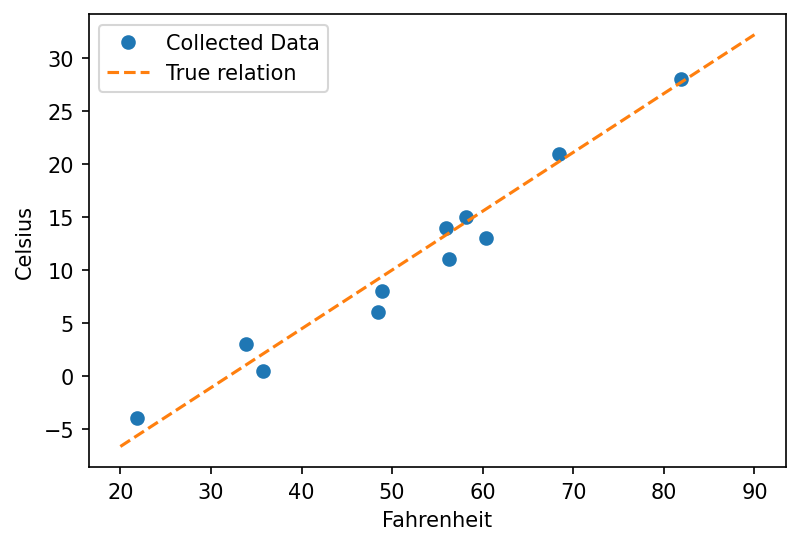

In [62]:
import numpy as np
from matplotlib import pyplot as plt

t_u_range = np.linspace(20., 90.)
t_c_range = (t_u_range -32) * 5/9

fig = plt.figure(dpi=150)
plt.xlabel("Fahrenheit")
plt.ylabel("Celsius")
plt.plot(t_u, t_c, 'o', label='Collected Data')
plt.plot(t_u_range, t_c_range, '--', label='True relation')
plt.legend(loc='best')

In [63]:
print('t_u as Numpy list:', t_u)

t_c = torch.tensor(t_c).unsqueeze(1) 
t_u = torch.tensor(t_u).unsqueeze(1) 
t_c = t_c.to(device)
t_u = t_u.to(device)

print("t_u after unsqueeze:\n", t_u)
t_u.shape

t_u as Numpy list: [35.7, 55.9, 58.2, 81.9, 56.3, 48.9, 33.9, 21.8, 48.4, 60.4, 68.4]
t_u after unsqueeze:
 tensor([[35.7000],
        [55.9000],
        [58.2000],
        [81.9000],
        [56.3000],
        [48.9000],
        [33.9000],
        [21.8000],
        [48.4000],
        [60.4000],
        [68.4000]], device='cuda:0')


torch.Size([11, 1])

In [64]:
n_samples = t_u.shape[0]
n_val = int(0.2 * n_samples)

shuffled_indices = torch.randperm(n_samples)

train_indices = shuffled_indices[:-n_val]
val_indices = shuffled_indices[-n_val:]

train_indices, val_indices

(tensor([2, 0, 8, 6, 7, 5, 3, 1, 9]), tensor([ 4, 10]))

In [0]:
t_u_train = t_u[train_indices]
t_c_train = t_c[train_indices]

t_u_val = t_u[val_indices]
t_c_val = t_c[val_indices]

**Watch out** for the scales of weights and biases. If they are in the different scaled space, one learning rate that is large for one enough to meaningfully update one will be so large as to be unstable for the other. 

The common way is to do the normalization to the data. But here it seems that a simple rescaling by a factor of ten can make the gradients of both weights and biases in the same magnitudes. That would be good enough for our demonstration.

In [0]:
t_un_train = 0.1 * t_u_train
t_un_val = 0.1 * t_u_val

## Using Neural Network model

In [68]:
import torch.nn as nn
dir(nn)

['AdaptiveAvgPool1d',
 'AdaptiveAvgPool2d',
 'AdaptiveAvgPool3d',
 'AdaptiveLogSoftmaxWithLoss',
 'AdaptiveMaxPool1d',
 'AdaptiveMaxPool2d',
 'AdaptiveMaxPool3d',
 'AlphaDropout',
 'AvgPool1d',
 'AvgPool2d',
 'AvgPool3d',
 'BCELoss',
 'BCEWithLogitsLoss',
 'BatchNorm1d',
 'BatchNorm2d',
 'BatchNorm3d',
 'Bilinear',
 'CELU',
 'CTCLoss',
 'ConstantPad1d',
 'ConstantPad2d',
 'ConstantPad3d',
 'Container',
 'Conv1d',
 'Conv2d',
 'Conv3d',
 'ConvTranspose1d',
 'ConvTranspose2d',
 'ConvTranspose3d',
 'CosineEmbeddingLoss',
 'CosineSimilarity',
 'CrossEntropyLoss',
 'CrossMapLRN2d',
 'DataParallel',
 'Dropout',
 'Dropout2d',
 'Dropout3d',
 'ELU',
 'Embedding',
 'EmbeddingBag',
 'FeatureAlphaDropout',
 'Flatten',
 'Fold',
 'FractionalMaxPool2d',
 'FractionalMaxPool3d',
 'GELU',
 'GLU',
 'GRU',
 'GRUCell',
 'GroupNorm',
 'Hardshrink',
 'Hardtanh',
 'HingeEmbeddingLoss',
 'Identity',
 'InstanceNorm1d',
 'InstanceNorm2d',
 'InstanceNorm3d',
 'KLDivLoss',
 'L1Loss',
 'LPPool1d',
 'LPPool2d',
 'LST

We use the simplest linear NN model with one hidden layer.
<img src="https://huqy.github.io/idre-learning-deep-learning-pytorch/img/nn_c2f.svg" alt="Linear NN model" style="width: 500px;"/>

In [69]:
from collections import OrderedDict

seq_model = nn.Sequential(OrderedDict([
    ('hidden_linear', nn.Linear(1, 8)), # 1 hidden layers and 8 features.
    ('hidden_activation', nn.Tanh()),
    ('output_linear', nn.Linear(8, 1))
]))

seq_model.to(device)

seq_model

Sequential(
  (hidden_linear): Linear(in_features=1, out_features=8, bias=True)
  (hidden_activation): Tanh()
  (output_linear): Linear(in_features=8, out_features=1, bias=True)
)

In [70]:
for name, param in seq_model.named_parameters():
    print(name, param.shape)

hidden_linear.weight torch.Size([8, 1])
hidden_linear.bias torch.Size([8])
output_linear.weight torch.Size([1, 8])
output_linear.bias torch.Size([1])


In [71]:
seq_model.output_linear.bias

Parameter containing:
tensor([-0.1354], device='cuda:0', requires_grad=True)

## Training

In [72]:
import torch.optim as optim
dir(optim) ## All current optimizers

['ASGD',
 'Adadelta',
 'Adagrad',
 'Adam',
 'AdamW',
 'Adamax',
 'LBFGS',
 'Optimizer',
 'RMSprop',
 'Rprop',
 'SGD',
 'SparseAdam',
 '__builtins__',
 '__cached__',
 '__doc__',
 '__file__',
 '__loader__',
 '__name__',
 '__package__',
 '__path__',
 '__spec__',
 'lr_scheduler']

In [0]:
def training_loop(n_epochs, optimizer, model, loss_fn, t_u_train, t_u_val, t_c_train, t_c_val):
    for epoch in range(1, n_epochs + 1):

        t_p_train = model(t_u_train) 
        loss_train = loss_fn(t_p_train, t_c_train)

        t_p_val = model(t_u_val) 
        loss_val = loss_fn(t_p_val, t_c_val)
        
        optimizer.zero_grad()
        loss_train.backward() 
        optimizer.step()

        if epoch == 1 or epoch % 1000 == 0:
            print('Epoch {}, Training loss {}, Validation loss {}'.format(
                epoch, float(loss_train), float(loss_val)))

In [75]:
optimizer = optim.SGD(seq_model.parameters(), lr=1e-3) 

training_loop(
    n_epochs = 5000, 
    optimizer = optimizer,
    model = seq_model,
    loss_fn = nn.MSELoss(),
    t_u_train = t_un_train,
    t_u_val = t_un_val, 
    t_c_train = t_c_train,
    t_c_val = t_c_val)
    
print('output', seq_model(t_un_val))
print('answer', t_c_val)
print('hidden', seq_model.hidden_linear.weight.grad) # overfitting already with several datapoints. Need early stop.

Epoch 1, Training loss 177.71563720703125, Validation loss 299.7477722167969
Epoch 1000, Training loss 5.697516441345215, Validation loss 4.157096862792969
Epoch 2000, Training loss 3.6671571731567383, Validation loss 1.911117672920227
Epoch 3000, Training loss 2.2836382389068604, Validation loss 1.3531489372253418
Epoch 4000, Training loss 2.128413200378418, Validation loss 1.1465487480163574
Epoch 5000, Training loss 2.0768518447875977, Validation loss 1.0179362297058105
output tensor([[12.4120],
        [20.7955]], device='cuda:0', grad_fn=<AddmmBackward>)
answer tensor([[11.],
        [21.]], device='cuda:0')
hidden tensor([[ 0.0233],
        [ 0.0279],
        [ 0.0248],
        [-0.0183],
        [-0.0044],
        [-0.0249],
        [-0.0056],
        [-0.0077]], device='cuda:0')


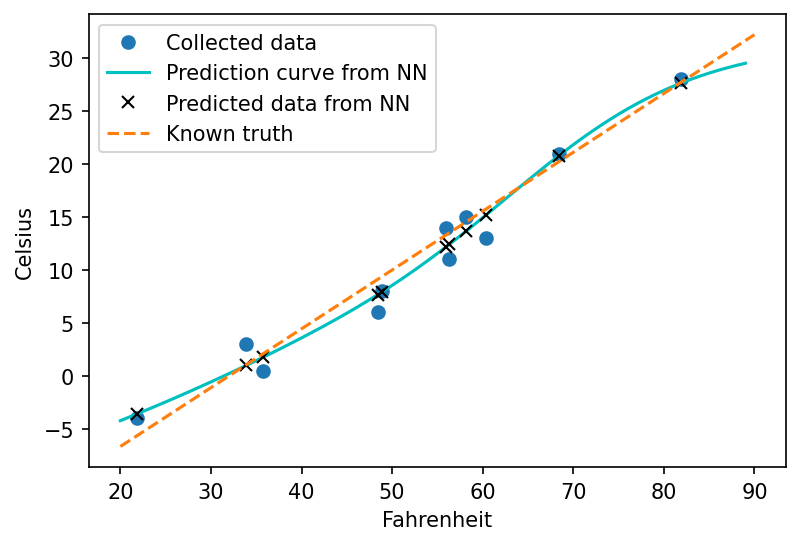

In [76]:
from matplotlib import pyplot as plt

t_range = torch.arange(20., 90.).unsqueeze(1)
t_range = t_range.to(device)

t_u_range = np.linspace(20., 90.)
t_c_range = (t_u_range -32) * 5/9

fig = plt.figure(dpi=150)
plt.xlabel("Fahrenheit")
plt.ylabel("Celsius")
plt.plot(t_u.cpu().numpy(), t_c.cpu().numpy(), 'o', label="Collected data") # on cpu, the values only wrote in numpy.
plt.plot(t_range.cpu().numpy(), seq_model(0.1 * t_range).detach().cpu().numpy(), 'c-', label="Prediction curve from NN")
plt.plot(t_u.cpu().numpy(), seq_model(0.1 * t_u).detach().cpu().numpy(), 'kx', label="Predicted data from NN")
plt.plot(t_u_range, t_c_range, '--', label="Known truth")
plt.legend(loc='best')